In [1]:
import numpy as np  # library of mathematical functions, such as square root

import pandas as pd  # library used for creating and manipulating dataframes

import matplotlib.pyplot as plt  # library for creating plots such as boxplots and histograms
%matplotlib inline  

import seaborn as sns  # library for creating plots such as boxplots and histograms, but more aesthetically appealing than those found in pyplot
sns.set(color_codes = True)

from scipy import stats  # library for calculating statistics and probabilities

import warnings
warnings.filterwarnings('ignore')  # prevent warnings from appearing when cells are executed

In [2]:
# Bring the csv file into python so we can work with it
data = pd.read_csv('AxisInsurance.csv') 

In [3]:
# See the first few rows of the data
data.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Make a copy of the original dataframe to ensure that the information in the original dataframe remains unchanged, and the new dataframe, df, can be manipulated as needed.
# Then view the first few rows of the new dataframe
df = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


___
# Structure of the Data

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Shape
There are 1338 rows in this data set.
There are 7 columns in this data set.

### Info
Column 0 is called "age."  It has 1338 non-null values of the int64 datatype.  According to the project prompt, this column states the age of the primary beneficiary.

Column 1 is called "sex."  It has 1338 non-null values of the object datatype.  According to the project prompt, this column states the gender of the policy holder, either male or female.

Column 2 is called "bmi."  It has 1338 non-null values of the float64 datatype.  According to the project prompt, this column states body mass index (BMI) of the customer.

Column 3 is called "children."  It has 1338 non-null values of the int64 datatype. According to the project prompt, this column states the number of children/dependents on the insurance plan.

Column 4 is called "smoker."  It has 1338 non-null values of the object datatype.  According to the project prompt, this column states whether or not the customer smokes regularly.

Column 5 is called "region."  It has 1338 non-null values of the object datatype.  According to the project prompt, this column states what geographic region of the United States the customer lives in.

Column 6 is called "charges."  It has 1338 non-null values of the float64 datatype.  According to the project prompt, this column states the individual medical costs billed to health insurance.

### Describe
The mean age of the customers is 39.2, and the median age is 39.  Since the mean and median are almost equal, this is likely to be a symmetric distribution.  The minimum age of the customers is 18 and the maximum age is 64.  Half of the customers are between 27 and 51 years old.

The mean BMI of the customers is 30.7, and the median BMI is 30.4. Since the mean and median are almost equal, this is likely to be a symmetric distribution.  The lowest BMI of the customers is 15.96 and the maximum BMI is 53.13.  Half of the customers have a BMI between 26.3 and 34.7.

The mean number of children of the customers is 1.1, and the median is 1.  Since the mean and median are almost equal, this is likely to be a symmetric distribution.  The lowest number of children the customers have is 0, and the highest is 5.  Half of the customers have 0, 1, or 2 children.

The mean amount charged by the customers is \\$13,270.42, and the median is \\$9,382.03.  Since the mean is larger than the median, this distribution is likely to be skewed to the right.  The smallest charge of the customers is \\$1,121.87, and the highest charge is \\$63,770.43.  Half of the customers have charges between \\$4,740.29 and \\$16,639.91.

___

# Questions to be answered

Insurance companies need to have a strong understanding of their customers' characteristics and how those characteristics affect their medical claims.  Answering the following questions will provide insights into which customers are most likely to have higher charges.  Providing this information to business leaders will empower them to make the best decisions possible for the company.

### <span style = "color:orange"> 1) Are the medical claims made by the people who smoke greater than those who don't? </span>

### <span style = "color:green"> 2) Are the BMIs of females in the data set different than the BMIs of males?</span>

### <span style = "color:blue"> 3)  Is the proportion of smokers significantly different across different regions?</span>

### <span style = "color:purple"> 4)  Is the mean BMI of women with zero children, one child, or two children the same?</span>

I will seek to answer each of these questions by performing exploratory data analysis relevant to each question, establishing a null and alternative hypothesis, identifying the correct test, verifying its assumptions, performing the test, and describing the conclusions that can be drawn based on the test results.

___

## <span style = "color:orange"> 1) Are the medical claims made by the people who smoke greater than those who don't? </span>

### EDA:
#### First, I would like to know some basic descriptive statistics about smokers -vs- non-smokers, including:

• How many total customers do we have?

• How many of those customers are smokers?  Non-smokers?

• What is the total amount claimed by smokers?  By non-smokers?

• What is the average amount claimed by smokers?  By non-smokers?

• What is the standard deviation of the amount claimed by smokers?  By non-smokers?

In [8]:
count_cust = df['smoker'].count()  # How many customers total are there?

#SMOKER INFORMATION
count_smokers = df[df['smoker'] == 'yes']['smoker'].count()  # How many of those customers smoke?
total_smoker_claims = df[df['smoker'] == 'yes']['charges'].sum()  # What is the total amount claimed by all smokers?
mean_smoker_claims = df[df['smoker'] == 'yes']['charges'].mean()  # What is the average amount claimed by smokers?
std_smoker_claims = df[df['smoker'] == 'yes']['charges'].std()  # What is the standard deviation of the amount claimed by smokers?

print('Out of ', count_cust, ' customers, there are ', count_smokers, ' who smoke.')
print('The average charges of a smoker is $', round(mean_smoker_claims, 2), ' and the standard deviation is $', round(std_smoker_claims, 2))
print('Total charges of all customers who smoke is $', round(total_smoker_claims, 2))

Out of  1338  customers, there are  274  who smoke.
The average charges of a smoker is $ 32050.23  and the standard deviation is $ 11541.55
Total charges of all customers who smoke is $ 8781763.52


In [9]:
#NON-SMOKER INFORMATION
count_nonsmokers = df[df['smoker'] == 'no']['smoker'].count()  # How many customers do not smoke?
total_nonsmoker_claims = df[df['smoker'] == 'no']['charges'].sum()  # What is the total amount claimed by all non-smokers?
mean_nonsmoker_claims = df[df['smoker'] == 'no']['charges'].mean()  # What is the average amount claimed by non-smokers?
std_nonsmoker_claims = df[df['smoker'] == 'no']['charges'].std()  # What is the standard deviation of the amount claimed by non-smokers?

print('Out of ', count_cust, ' customers, there are ', count_nonsmokers, ' who do not smoke.')
print('The average charges of a non-smoker is $', round(mean_nonsmoker_claims, 2), ' and the standard deviation is $', round(std_nonsmoker_claims, 2))
print('Total charges of all customers who do not smoke is $', round(total_nonsmoker_claims, 2))


Out of  1338  customers, there are  1064  who do not smoke.
The average charges of a non-smoker is $ 8434.27  and the standard deviation is $ 5993.78
Total charges of all customers who do not smoke is $ 8974061.47


#### Second, I would like to visualize the information I gathered above.

Text(0, 0.5, 'Count')

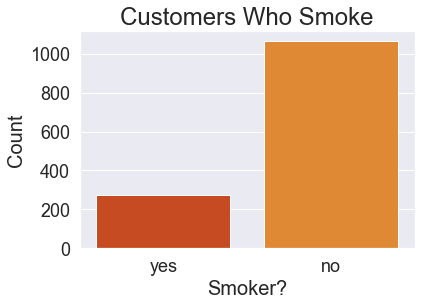

In [10]:
# This count plot displays the large disparity between the number of smokers compared to the number of non-smokers.

sns.countplot(df['smoker'], palette=['#E13C07', '#FC8917']).set_title('Customers Who Smoke', fontsize=24)
plt.xticks(fontsize=18)
plt.xlabel('Smoker?', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=20)

Text(0, 0.5, 'Smoker')

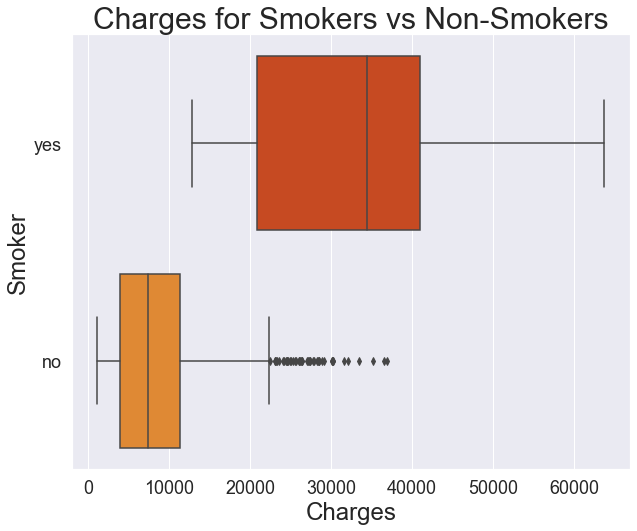

In [11]:
# This box plot displays the large disparity between the charges claimed by smokers compared to non-smokers.
# 75% of non-smokers have claims of approximately $12,000 or less.
# 75% of smokers have claims of approximately $21,000 or more.

plt.figure(figsize=(10,8))
sns.boxplot(df['charges'], df['smoker'], palette=['#E13C07', '#FC8917']).set_title('Charges for Smokers vs Non-Smokers', fontsize=30)
plt.xticks(fontsize=18)
plt.xlabel('Charges', fontsize=24)
plt.yticks(fontsize=18)
plt.ylabel('Smoker', fontsize=24)

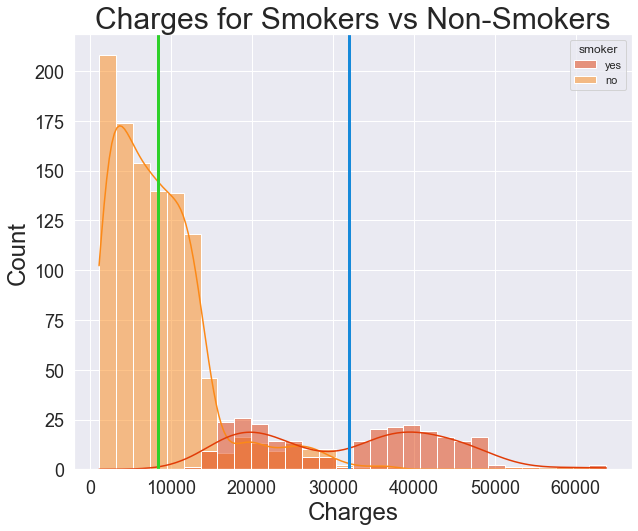

In [12]:
# This histogram displays the large disparity between the charges claimed by smokers compared to non-smokers.
# Almost all non-smokers have charges less than $20,000. The mean, shown in green, is approximately $8,000.
# Conversely, almost all smokers have charges of $20,000 or more.  The mean, shown in blue, is approximately $32,000.

plt.figure(figsize=(10,8))
sns.histplot(data=df, x='charges', hue='smoker', kde=True, palette=['#E13C07', '#FC8917']).set_title('Charges for Smokers vs Non-Smokers', fontsize=30)
plt.xticks(fontsize=18)
plt.xlabel('Charges', fontsize=24)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=24)
plt.axvline(mean_smoker_claims, color='#1589DA', linewidth=3)
plt.axvline(mean_nonsmoker_claims, color='#2FD02A', linewidth=3)

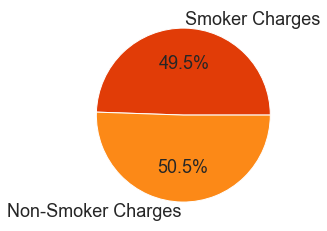

In [13]:
# This pie graph displays that the total amount claimed by smokers and the total amount claimed by non-smokers is almost equal.

labels = 'Smoker Charges', 'Non-Smoker Charges'
sizes = [total_smoker_claims, total_nonsmoker_claims]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=['#E13C07', '#FC8917'], textprops={'fontsize': 18})
plt.show()

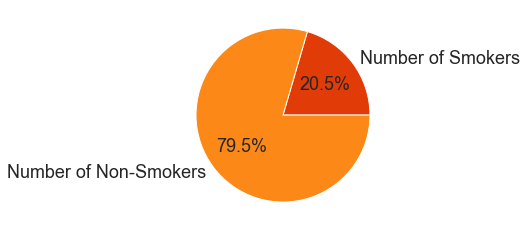

In [14]:
# This pie graph displays that smokers account for only 20.5% of all customers.  (Similar to the count plot I created first.)
# These two pie graphs draw attention to the fact that charges claimed for smokers is far greater than the charges claimed by non-smokers, despite the fact that non-smokers far out-number smokers.

labels = 'Number of Smokers', 'Number of Non-Smokers'
sizes = [count_smokers, count_nonsmokers]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=['#E13C07', '#FC8917'], textprops={'fontsize': 18})
plt.show()

## <span style = "color:orange"> Conclusions based on EDA </span>

#### • The data tells us that more of our customers are non-smokers than smokers.  
1,338 customers were analyzed.  274 customers smoke (20.5%) and 1,064 customers do not smoke (79.5%).  

#### • The data tells us that customers who smoke have higher charges than customers who do not smoke.  
75% of customers who smoke have claims of approximately \\$21,000 or more.  Whereas 75% of customers who do not smoke have claims of approximately \\$12,000 or less.  

#### • The data tells us that the average claim made by a smoker is higher than the average claim made by a non-smoker.
The mean charges of a smoker is \\$32,050.23.  The mean charges of a non-smoker is \\$8,434.27.

The descriptive statistics gathered above lead me to the conclusion that the claims filed by smokers are higher than those filed by non-smokers.

### I will now seek to prove the project prompt about claims of smokers using a hypothesis test.

Let µ$_1$ equal the mean claim value of a smoker.

Let µ$_2$ equal the mean claim value of a non-smoker.

Let α = 0.05


H$_0$ : µ$_1$ = µ$_2$

H$_a$ : µ$_1$ > µ$_2$

To calculate the p-value for this scenario, I will use a two independent sample t-test for equality of means.  This is because we have two samples that are independent of one another (smoker claims vs non-smoker claims), and because although the sample size is greater than 30, we do not know the population standard deviation, and therefore cannot use a z-test and instead must use a t-test.  This will be a one-tailed test because I am only testing if µ$_1$ is greater than µ$_2$, not whether µ$_1$ is not equal to µ$_2$.

In [15]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df['charges'][df['smoker']=='yes'], df['charges'][df['smoker']=='no'], equal_var = False, alternative = 'greater')
print(p_value)

2.94473222335849e-103


In [16]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(df['charges'][df['smoker']=='yes'], df['charges'][df['smoker']=='no'], equal_var = True, alternative = 'greater')
print(p_value)

4.1357179210886093e-283


## <span style = "color:orange"> Conclusion based on hypothesis test </span>

With a p-value of 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000029447 (which is obviously less than the signficance level of 0.05), we can conclusively say that the null hypothesis should be rejected, meaning that the claims of smokers is greater than the claims of non-smokers.

___

## <span style = "color:green"> 2) Are the BMIs of females in the data set different than the BMIs of males? </span>

### EDA:
#### First, I would like to know some basic descriptive statistics about males and females and their BMIs, including:

• How many total customers do we have?

• How many of those customers are male?  Female?

• What is the average BMI of males?  Females?

• What is the average amount claimed by males?  By females?

• What is the standard deviation of the amount claimed by males?  By females?

• What is the average amount claimed by customers in each BMI level?

• What is the standard deviation of the amount claimed by customers in each BMI level?


Text(0, 0.5, 'Count')

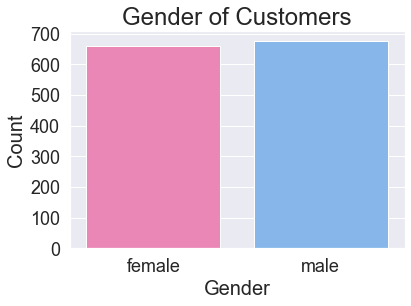

In [17]:
# This count plot displays the number of male and female customers, which is almost equal.

sns.countplot(df['sex'], palette=['#FB76B6', '#76B6FB']).set_title('Gender of Customers', fontsize=24)
plt.xticks(fontsize=18)
plt.xlabel('Gender', fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Count', fontsize=20)

In [18]:
# This code will provide the count, mean, standard deviation, and 5-number summary of the BMIs of males and females in the data set.

df.groupby(by=['sex'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


(array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

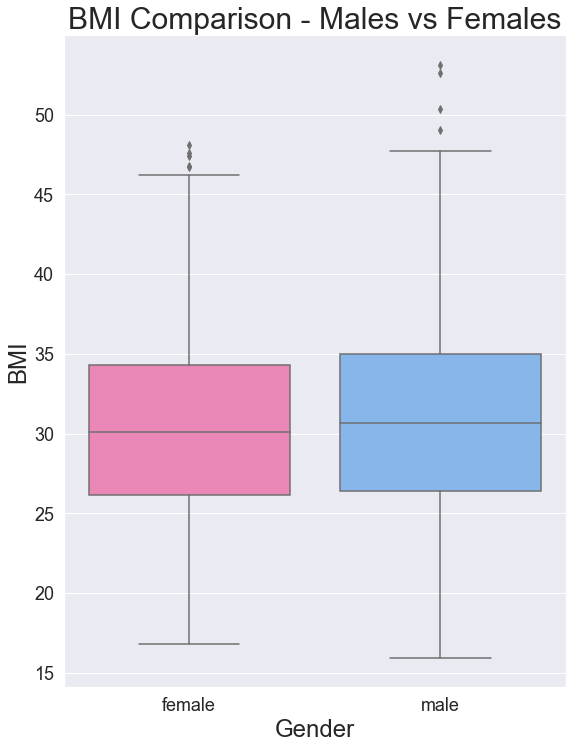

In [19]:
# This boxplot shows that the BMIs of males and females appear to be very similar.

plt.figure(figsize=(9,12))
sns.boxplot(x=df['sex'], y=df['bmi'], palette=['#FB76B6', '#76B6FB']).set_title('BMI Comparison - Males vs Females', fontsize=30)
plt.xlabel('Gender', size=24)
plt.xticks(size=18)
plt.ylabel('BMI', size=24)
plt.yticks(size=18)

In [20]:
# I would like to see how many customers fall into each BMI category, so I will create a new column in my dataframe, then count according to those categories.

bmi = df['bmi']

cond_list_bmi = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
choice_list_bmi = ['underweight', 'healthy', 'overweight', 'obese']

df['bmi_cat'] = np.select(cond_list_bmi, choice_list_bmi)

df.groupby(by=['bmi_cat'])['bmi_cat'].count()

bmi_cat
healthy        225
obese          707
overweight     386
underweight     20
Name: bmi_cat, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

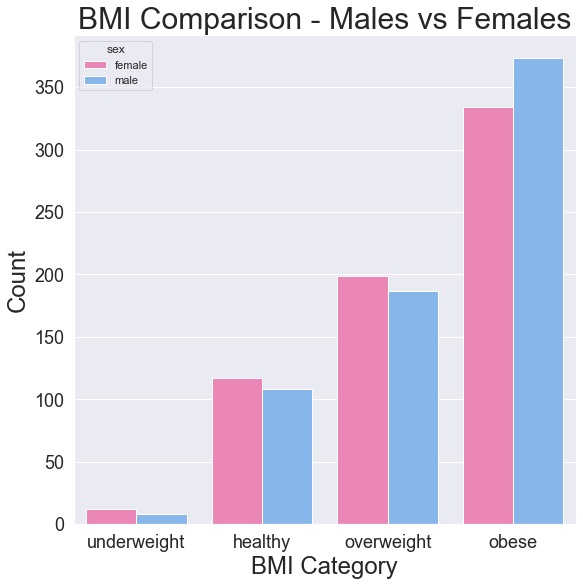

In [21]:
# This count plot shows how many males and females fall into each BMI category.

plt.figure(figsize=(9,9))
sns.countplot(x=df['bmi_cat'], hue=df['sex'], palette=['#FB76B6', '#76B6FB'], order=['underweight', 'healthy', 'overweight', 'obese']).set_title('BMI Comparison - Males vs Females', fontsize=30)
plt.xlabel('BMI Category', size=24)
plt.xticks(size=18)
plt.ylabel('Count', size=24)
plt.yticks(size=18)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

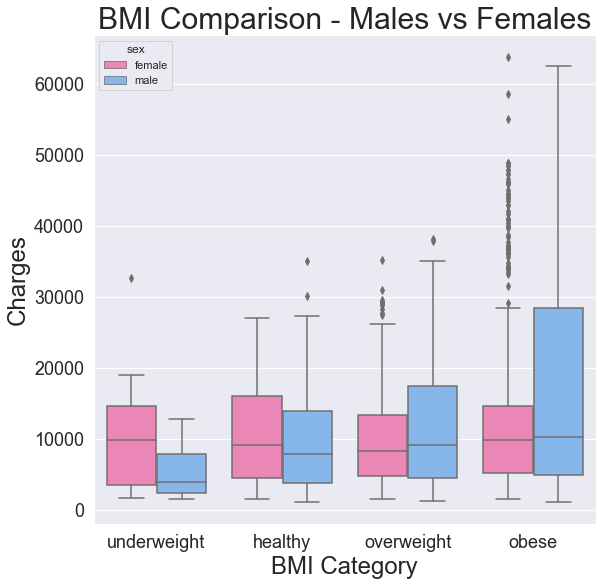

In [22]:
# This boxplot shows the distribution of charges based on BMI category and gender.

plt.figure(figsize=(9,9))
sns.boxplot(x=df['bmi_cat'], y=df['charges'], hue=df['sex'], palette=['#FB76B6', '#76B6FB'], order=['underweight', 'healthy', 'overweight', 'obese']).set_title('BMI Comparison - Males vs Females', fontsize=30)
plt.xlabel('BMI Category', size=24)
plt.xticks(size=18)
plt.ylabel('Charges', size=24)
plt.yticks(size=18)

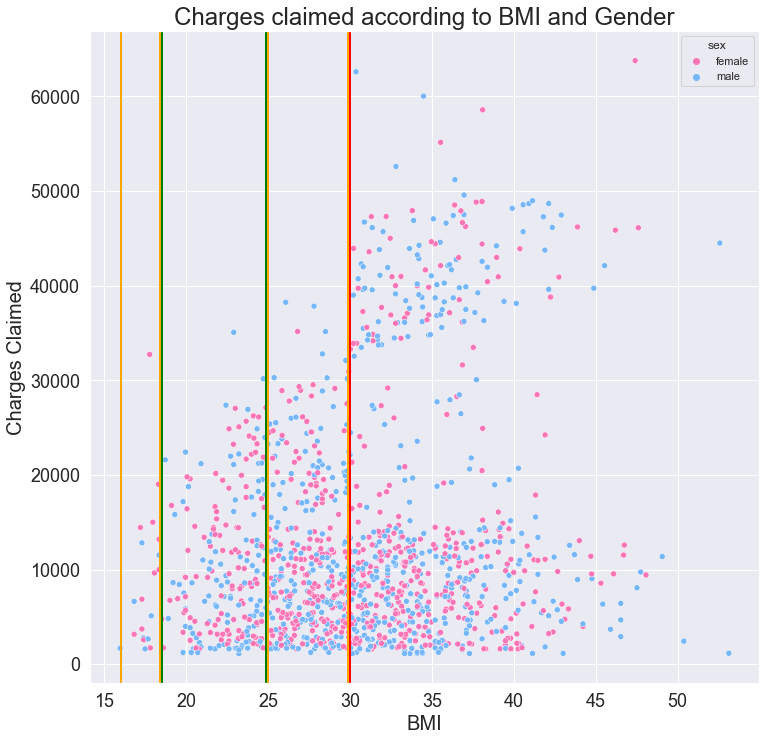

In [23]:
# This scatter plot shows the charges claimed by males (blue) and females (pink).
# This scatter plot also has vertical lines representing the boundaries of each category of BMI.

plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex', palette=['#FB76B6', '#76B6FB']).set_title('Charges claimed according to BMI and Gender', fontsize=24)

plt.xlabel('BMI', fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('Charges Claimed', fontsize=20)
plt.yticks(fontsize=18)

plt.axvline(16, color='orange', linewidth=2)  #underweight range
plt.axvline(18.4, color='orange', linewidth=2)  #adjusted slightly for visualization enhancement

plt.axvline(18.5, color='green', linewidth=2)  #healthy range
plt.axvline(24.85, color='green', linewidth=2)  #adjusted slightly for visualization enhancement

plt.axvline(25, color='orange', linewidth=2)  #overweight
plt.axvline(29.85, color='orange', linewidth=2)  #adjusted slightly for visualization enhancement

plt.axvline(30, color='red', linewidth=2)  #obese

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

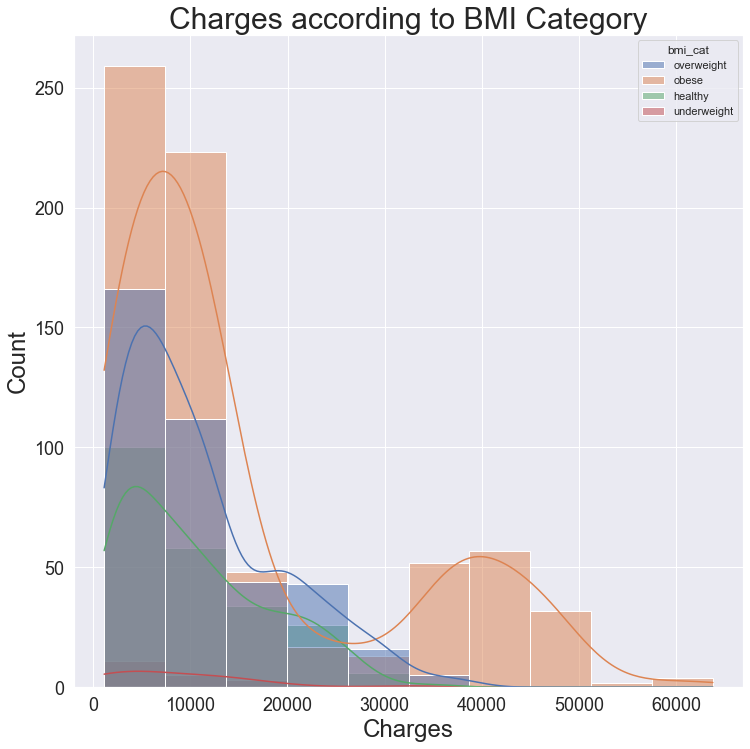

In [24]:
# This histogram shows the distribution of charges for each BMI category.

plt.figure(figsize=(12,12))
sns.histplot(data=df, x='charges', hue='bmi_cat', bins=10, kde=True).set_title('Charges according to BMI Category', fontsize=30)
plt.xlabel('Charges', size=24)
plt.xticks(size=18)
plt.ylabel('Count', size=24)
plt.yticks(size=18)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

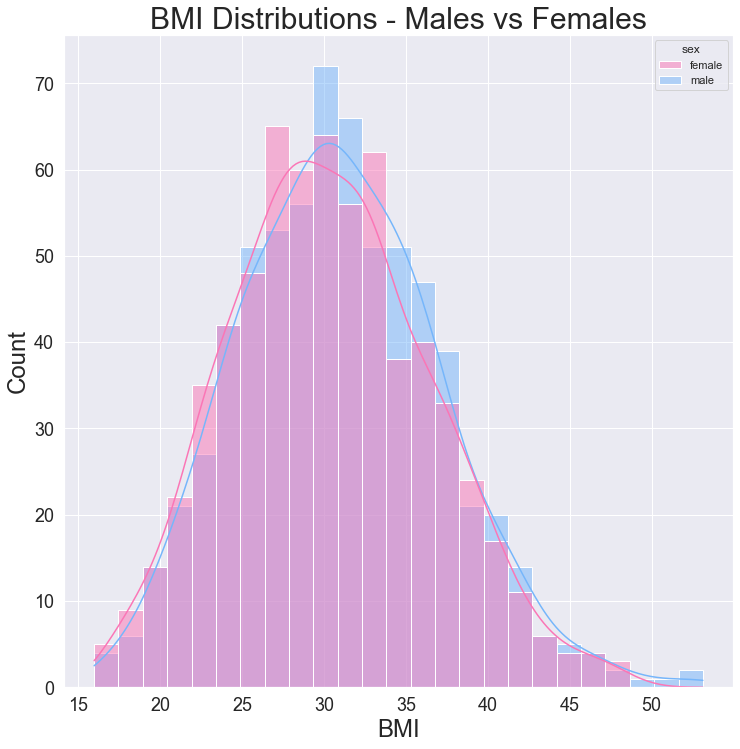

In [25]:
# This histogram shows that the distribution of BMIs for males and females are very similar.

plt.figure(figsize=(12,12))
sns.histplot(data=df, x='bmi', hue='sex', kde=True, palette=['#FB76B6', '#76B6FB']).set_title('BMI Distributions - Males vs Females', fontsize=30)
plt.xlabel('BMI', size=24)
plt.xticks(size=18)
plt.ylabel('Count', size=24)
plt.yticks(size=18)

## <span style = "color:green"> Conclusions from EDA </span>

#### The data tells us that we have approximately the same number of male and female customers.
Out of 1,338 total customers, 662 are female (49.5%) and 676 are male (50.5%)

#### The data appears to tell us that the proportion of males and females in each BMI category varies slightly.
There are more females than males in the BMI categories of underweight, healthy, and overweight.

There are more males than females in the BMI category of obese.

#### The data appears to tell us that the higher charges claimed tend to be made by customers who have higher BMIs.
The vast majority of customers with underweight, healthy, and overweight BMIs have charges less than \\$30,000.  A few have charges between \\$30,000 and \\$40,000.  But none have charges greater than \\$40,000.

Most customers who are obese have charges less than \\$15,000.  However, a considerable number of obese customers have charges of \\$30,000 or more.

#### The data tells us that the distribution of BMIs for males and females is approximately equal.
The mean BMI for males is 30.9.  The mean BMI for females is 30.4.

The median BMI for males is 30.7.  The median BMI for females is 30.1.

The minimum BMI for males is 16.0.  The minimum BMI for females is 16.8.

The maximum BMI for males is 53.1.  The maximum BMI for females is 48.1.

The IQR of BMIs for males is 8.6 (35.0 - 26.4).  The IQR of BMIs for females is 8.2 (34.3 - 26.1).


### I will now seek to prove the project prompt about BMIs according to gender using a hypothesis test.

Let µ$_1$ equal the mean BMI of a female.

Let µ$_2$ equal the mean BMI of a male.

Let α = 0.05

H$_0$ : µ$_1$ = µ$_2$

H$_a$ : µ$_1$ ≠ µ$_2$

To calculate the p-value for this scenario, I will use a two independent sample t-test for equality of means.  This is because we have two samples that are independent of one another (female BMI vs male BMI), and because although the sample size is greater than 30, we do not know the population standard deviation, and therefore cannot use a z-test and instead must use a t-test.  This will be a two-tailed test because I am testing if µ$_1$ is not equal to µ$_2$, not whether µ$_1$ is greater/less than µ$_2$.

In [26]:
from scipy.stats import ttest_ind

test_stat2, p_value2 = ttest_ind(df['bmi'][df['sex']=='female'], df['bmi'][df['sex']=='male'], equal_var = False, alternative = 'two-sided')
print(p_value2)

0.08992430667834876


## <span style = "color:green"> Conclusions from hypothesis test </span>
The p-value of the test is approximately 0.09, which is greater than the predetermined level of significance of 0.05.  Therefore, we fail to reject the null hypothesis.  Which means that, statistically speaking, the BMI of males and females in this dataset are equal.  

___

## <span style = "color:blue"> 3)  Is the proportion of smokers significantly different across different regions?</span>

### EDA:
#### First, I would like to know some basic descriptive statistics about the number of smokers vs non-smokers in each region:

• How many total customers do we have?

• How many of those customers live in each region?

• How many customers in each region smoke?  How many do not smoke?

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

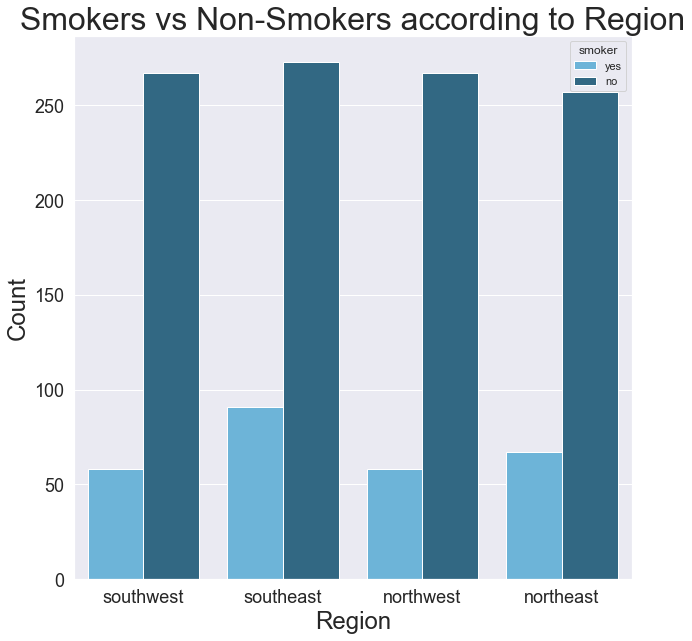

In [27]:
# This count plot displays the number of smokers vs non-smokers by region

plt.figure(figsize=(10,10))
sns.countplot(data=df, x='region', hue='smoker', palette=['#5BBAEA', '#256C90']).set_title('Smokers vs Non-Smokers according to Region', fontsize=32)
plt.xlabel('Region', size=24)
plt.xticks(size=18)
plt.ylabel('Count', size=24)
plt.yticks(size=18)

In [28]:
cont_table_w_margins = pd.crosstab(df['region'],
                        data['smoker'], 
                        margins = True)
print(cont_table_w_margins)

smoker       no  yes   All
region                    
northeast   257   67   324
northwest   267   58   325
southeast   273   91   364
southwest   267   58   325
All        1064  274  1338


In [29]:
cont_table = pd.crosstab(df['region'],
                        data['smoker'], 
                        margins = False)

## <span style = "color:blue"> Conclusions from EDA </span>

#### The data tells us that the proportion of smokers vs non-smokers in each region is similar.

• Northeast: 20.7% smoke, 79.3% do not smoke

• Northwest: 17.8% smoke, 82.2% do not smoke

• Southeast: 25.0% smoke, 75.0% do not smoke

• Southwest: 17.8% smoke, 82.2% do not smoke


### I will now seek to prove the project prompt about smokers by region using a hypothesis test.

Let α = 0.05

H$_0$ : Smoking preference is independent of region

H$_a$ : Smoking preference is not independent of region

To calculate the p-value for this scenario, I will use a chi-squared test for independence.  I can use this test because I am dealing with categorical variables (region and smoking preference), the number of observations for each variable is greater than five, and the data was randomly sampled.

In [30]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(cont_table)
print(p_value)

0.06171954839170541


## <span style = "color:blue"> Conclusions from hypothesis test </span>

The p-value is 0.06, which is greater than the predetermined level of significance of 0.05.  Therefore, we fail to reject the null hypothesis, meaning that smoking preference is independent of region.  This allows us to conclude that the proportion of smokers is not significantly different across regions.

___

## <span style = "color:purple"> 4)  Is the mean BMI of women with zero children, one child, or two children the same?</span>

### EDA:
#### First, I would like to know some basic descriptive statistics about the female customers, their BMIs, and the number of children they have.

• How many female customers have zero children?  1 child?  2 children?  3 or more children?

• How are the BMIs distributed amongst all women?

• How are the BMIs distributed amongst women with different numbers of children?


In [31]:
# This question deals with only female customers, so I will make a new dataframe to work with that only contains the female customers.

female = df[df['sex'] == 'female'].copy()
female.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [32]:
# The question from the project prompt only asks about zero vs one vs two children.  
# I think it may be interesting to group the women who have 3 or more children into their own category.
# So I will add a column to the female dataframe the states whether each female customer has zero, one, two, or three or more children.
# I will test both questions (zero vs one vs two AND zero vs one vs two vs three+) so that the grader of this project can see the "actual" answer and so I can satisfy my curiosity.  

kids = female['children']

cond_list_kids = [kids == 0, kids == 1, kids == 2, kids >= 3]
choice_list_kids = ['zero kids', 'one kid', 'two kids', 'three or more kids']

female['kid_cat'] = np.select(cond_list_kids, choice_list_kids)

female.groupby(by=['kid_cat'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
kid_cat,,,,,,,,
one kid,158.0,30.052658,5.786831,16.815,25.9825,29.5675,33.94250,46.09
three or more kids,96.0,30.624427,6.013468,18.300,26.6000,30.2100,34.15875,46.75
two kids,119.0,30.649790,6.628200,17.195,25.7700,31.3000,34.75000,48.07
zero kids,289.0,30.361522,5.966934,17.290,26.2000,29.9250,34.60000,47.41


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

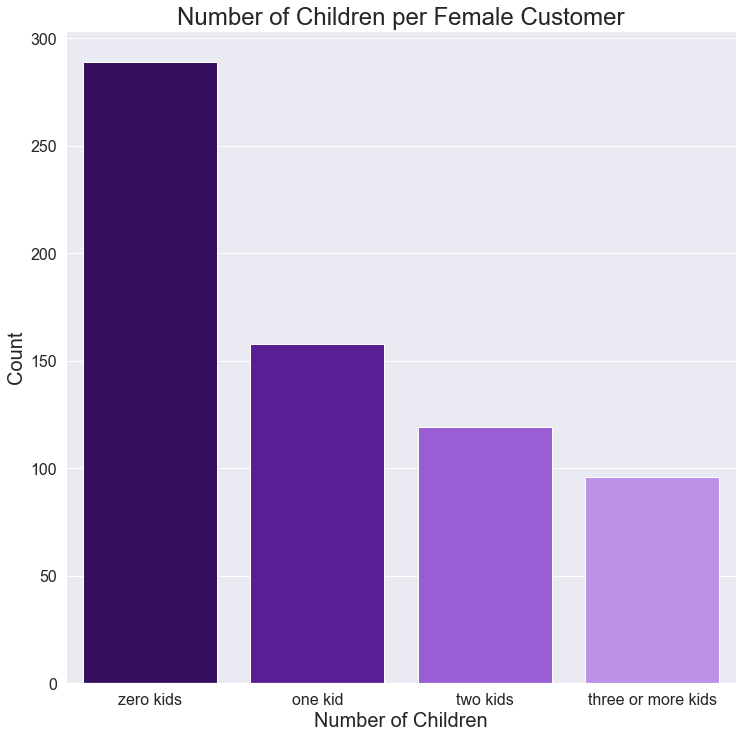

In [33]:
# This count plot displays the number of women with 0, 1, 2, or 3+ children.

plt.figure(figsize=(12,12))
sns.countplot(female['kid_cat'], order=('zero kids', 'one kid', 'two kids', 'three or more kids'), palette=['#36026B', '#590BA7', '#9949E8', '#BC82F6']).set_title('Number of Children per Female Customer', fontsize=24)
plt.xlabel('Number of Children', size=20)
plt.xticks(size=16)
plt.ylabel('Count', size=20)
plt.yticks(size=16)

(array([15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

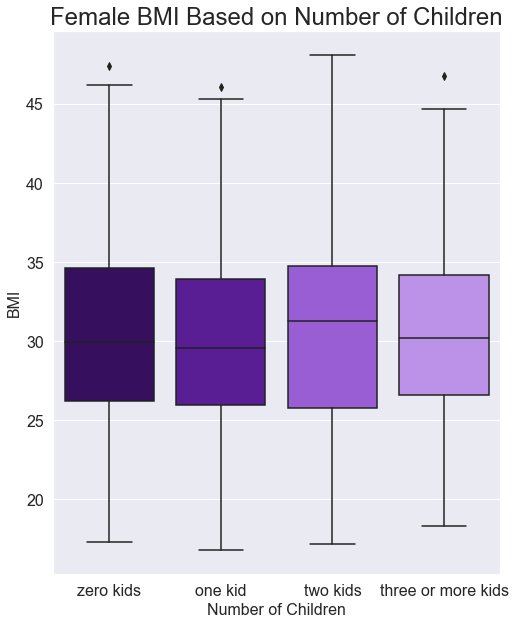

In [34]:
# This box plot displays the distribution of BMIs for women with 0, 1, 2, or 3+ children.

plt.figure(figsize=(8,10))
sns.boxplot(x=female['kid_cat'], y=female['bmi'], order=('zero kids', 'one kid', 'two kids', 'three or more kids'), palette=['#36026B', '#590BA7', '#9949E8', '#BC82F6']).set_title('Female BMI Based on Number of Children', fontsize = 24)
plt.xlabel('Number of Children', size=16)
plt.xticks(size=16)
plt.ylabel('BMI', size=16)
plt.yticks(size=16)

## <span style = "color:purple"> Conclusions from EDA </span>

#### The data tells us that the mean BMI of women with 0, 1, 2, and 3+ children is very similar.

• 43.7% of female customers have zero children (289 out of 662).  The average BMI of a woman with zero children is approximately 30.36.  The standard deviation is approximately 5.97.

• 23.9% of female customers have one child (158 out of 662).  The average BMI of a woman with one child is approximately 30.05. The standard deviation is approximately 5.79

• 17.9% of female customers have two children (119 out of 662).  The average BMI of a woman with two children is approximately 30.65. The standard deviation is approximately 6.63.

• 14.5% of female customers have three or more children (96 out of 662).  The average BMI of a woman with three or more children is approximately 30.62. The standard deviation is approximately 6.01.


### I will now seek to prove the project prompt about BMIs of women with children using a hypothesis test.

Let α = 0.05

Let μ$_0$ equal the mean BMI of women with zero children.

Let μ$_1$ equal the mean BMI of women with one child.

Let μ$_2$ equal the mean BMI of women with two children.


H$_0$ : μ$_0$ =  μ$_1$ = μ$_2$

H$_a$ : At least one of the means listed in H$_0$ is not equal to the others.

To calculate the p-value for this scenario, I will use an ANOVA test because I am comparing three or more samples.  In order to use the ANOVA test, we must first use the Shapiro-Wilk Test to confirm that the data is normally distributed.  And then we must use the Levene Test to confirm the variances are equal.

### Shapiro-Wilk Test

H$_0$ : The mean BMIs of women with zero, one, two, (or three+) children are normally distributed

H$_a$ : The mean BMIs of women with zero, one, two, (or three+) children are not normally distributed

In [35]:
w, p_value = stats.shapiro(female['bmi'])
print(p_value)

0.0035433683078736067


p_value of 0.0035 is less than the level of significance of 0.05.  Therefore, we should reject the null hypothesis and conclude that the mean BMIs of women with zero, one, two, or three+ children is not normally distributed.  However, that would mean that the ANOVA test cannot be used.

I don't think the videos taught us what to do in this situation.  However, when I raised a ticket about this issue, I was told to proceed as if the data was normally distributed. 

Researching further, I found the following quote from yieldingresults.org:

"the Shapiro-Wilk test is rarely used to detect normality since graphical representations are so much more useful. Furthermore, the Shapiro-Wilk test is sensitive to sample size. For small samples, even big departures from normality are not detected while for large samples small deviations from normality will lead to the null hypothesis being rejected."

The histogram shown below demonstrates that visually this data is normal as it follows the traditional bell-shape.  Therefore, I will assume that this is a normal distribution and continue with the ANOVA test.

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

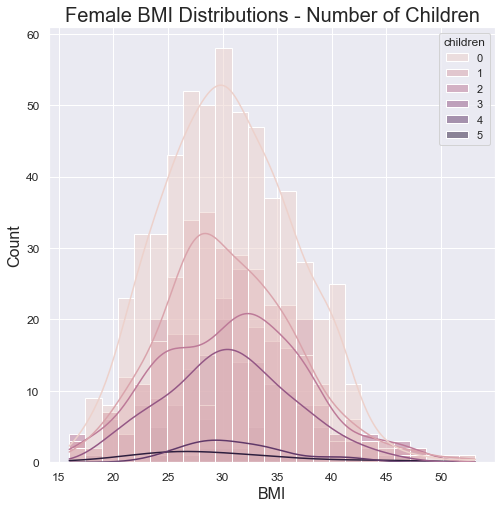

In [36]:
# The histogram shown below demonstrates that visually this data is normal as it follows the traditional bell-shape. 
# Therefore, I will assume that this is a normal distribution and continue with the ANOVA test.

plt.figure(figsize=(8,8))
sns.histplot(data=df, x='bmi', hue='children', kde=True).set_title('Female BMI Distributions - Number of Children', fontsize=20)
plt.xlabel('BMI', size=16)
plt.xticks(size=12)
plt.ylabel('Count', size=16)
plt.yticks(size=12)

I also found online that a QQ plot or a probplot can be used to determine if a dataset is normally distributed.  The closer to linear the data is, the more normal it is.  So I made these plots as well, and with an R-squared value of .9940, it is very close to perfectly linear, which I believe is more evidence that the data is normally distributed, despite what the Shapiro-Wilk test said.

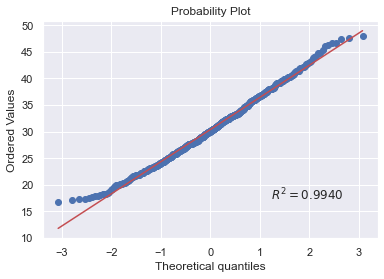

In [37]:
normality_plot, stat = stats.probplot(female['bmi'], plot= plt, rvalue= True)

Based on all the information gathered above, I will proceed with the ANOVA test.

### Levene Test

H$_0$ : The BMI variances of women with zero, one, two, (or three+) children are equal

H$_a$ : The BMI variances of women with zero, one, two, (or three+) children are not equal

In [38]:
statistic, p_value = stats.levene(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2], female['bmi'][female['children']>2])
print(p_value)

0.5871535029660999


p_value of 0.587 is greater than the level of significance of 0.05.  Therefore, we fail to reject the null hypothesis and conclude that the variances of women with zero, one, two, or three+ children are equal.

## ANOVA Test

In [39]:
# ANOVA test according to project prompt: comparing 0 vs 1 vs 2 children

test_stat, p_value = stats.f_oneway(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2])
print(p_value)

0.7158579926754841


In [40]:
# ANOVA test according to my curiosity: comparing 0 vs 1 vs 2 vs 3+ children

test_stat, p_value = stats.f_oneway(female['bmi'][female['children']==0], female['bmi'][female['children']==1], female['bmi'][female['children']==2], female['bmi'][female['children']>2])
print(p_value)

0.8358106159404568


## <span style = "color:purple"> Conclusions from hypothesis test </span>

The p-values of 0.72 or 0.84 are greater than the predetermined level of signficance of 0.05.  Therefore, we fail to reject the null hypothesis and we conclude that the mean BMIs of women with zero, one, two, (or three+) children are statistically equal.

___